___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

Text(0, 0.5, 'Thousands of Persons')

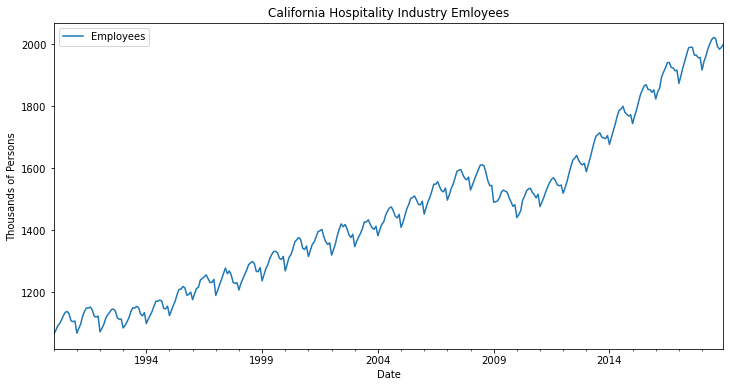

In [7]:
## CODE HERE

df.plot(figsize=(12,6), legend=True)
plt.title("California Hospitality Industry Emloyees")
plt.ylabel("Thousands of Persons")



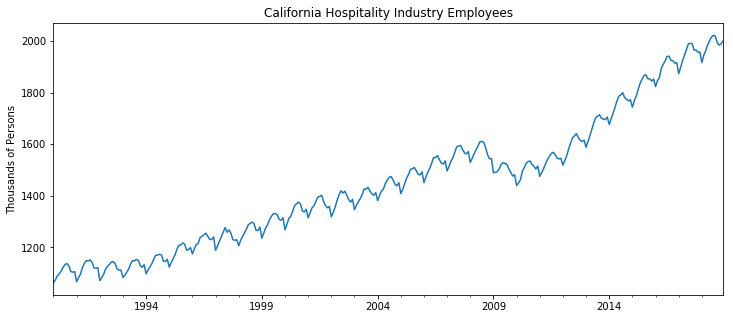

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

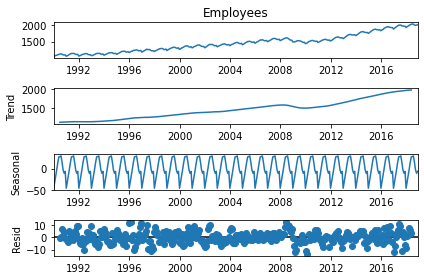

In [14]:
decomposition = seasonal_decompose(df['Employees'], model='add')
decomposition.plot();

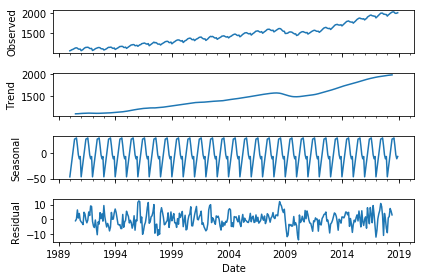

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [17]:
auto_arima(df['Employees'], seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2214.387, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2974.636, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2707.381, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2980.790, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2340.936, Time=1.38 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2327.595, Time=3.91 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2266.052, Time=7.09 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.25 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2264.870, Time=4.00 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.92 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2210.598, Time=2.57 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 21 Jan 2021   AIC                           2208.504
Time:                                      19:09:45   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color = green> <b> From the above auto arima model, we have Received p=1, d=1, q=2, P=1, D=0, Q=1

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [22]:
nobs = 12

train =  df.iloc[:-nobs]
test = df.iloc[-nobs:]

In [23]:
train.shape

(336, 1)

In [21]:
test.shape

(12, 1)

In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(1,1,2)(1,0,1,12) model to the training set

In [25]:
model = SARIMAX(train['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))

In [26]:
results = model.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Thu, 21 Jan 2021   AIC                           2128.117
Time:                                      19:18:34   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9242      0.043     21.309      0.000       0.839       1.009
ma.L1         -0.9586      0.070    -13.608      0.000      -1.097      -0.821
ma.L2          0.1498      0.061      2.448      0.014       0.030       0.270
ar.S.L12       0.9973      0.001    733.473      0.000       0.995       1.000
ma.S.L12      -0.7522      0.044    -17.167      0.000      -0.838      -0.666
sigma2        28.7570      1.683     17.084      0.000      25.458      32.056
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.31
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [29]:
start = len(train)
end = len(train) + len(test) - 1

In [33]:
predictions = results.predict(start,end).rename("SARIMA-Model-Predicted Values")

In [34]:
predictions

2018-01-01    1922.286383
2018-02-01    1941.845459
2018-03-01    1959.854681
2018-04-01    1983.204649
2018-05-01    2002.911261
2018-06-01    2019.444513
2018-07-01    2026.308473
2018-08-01    2028.250979
2018-09-01    2009.872186
2018-10-01    2004.774325
2018-11-01    1996.722026
2018-12-01    2000.527371
Freq: MS, Name: SARIMA-Model-Predicted Values, dtype: float64

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

Text(0, 0.5, 'Thousands of Persons')

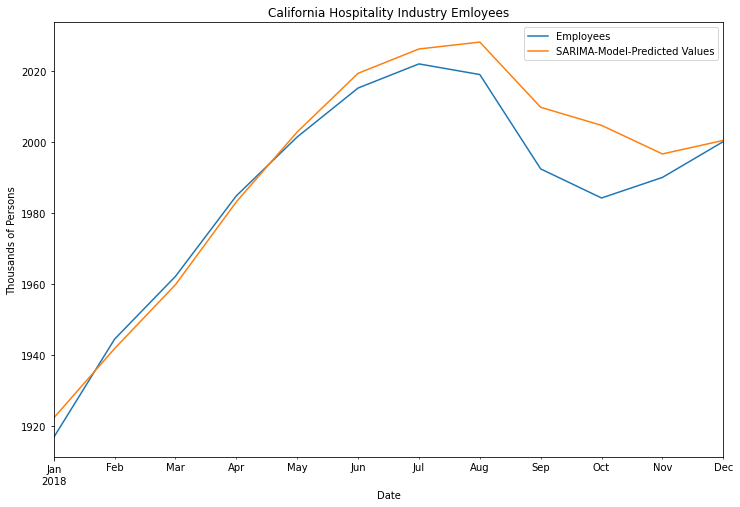

In [35]:
test['Employees'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)
plt.title("California Hospitality Industry Emloyees")
plt.ylabel("Thousands of Persons")


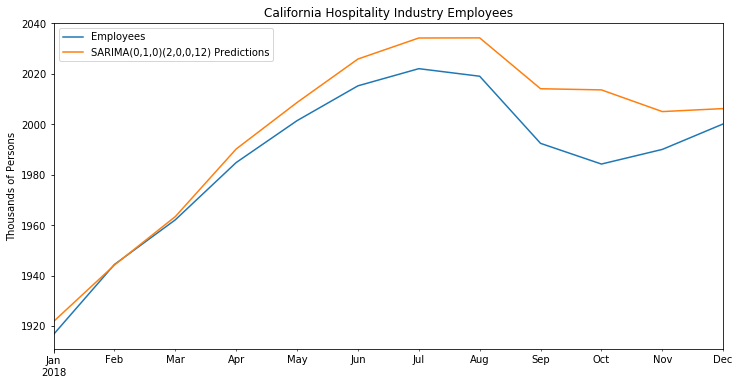

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [37]:
print("MSE Error: ", mean_squared_error(test['Employees'], predictions))
print("RMSE Error: ", rmse(test['Employees'], predictions))

MSE Error:  77.59093949717992
RMSE Error:  8.808571932906032


In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [40]:
modelF = SARIMAX(df['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))

In [41]:
resultsF = modelF.fit()

In [49]:
fcast =  resultsF.predict(len(df),len(df)+12)

In [50]:
fcast

2019-01-01    1963.876381
2019-02-01    1986.811315
2019-03-01    2005.990827
2019-04-01    2030.323614
2019-05-01    2050.305235
2019-06-01    2067.131599
2019-07-01    2074.910484
2019-08-01    2076.477995
2019-09-01    2056.894510
2019-10-01    2051.833006
2019-11-01    2047.915000
2019-12-01    2053.881163
2020-01-01    2018.360688
Freq: MS, Name: predicted_mean, dtype: float64

In [51]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

Text(0, 0.5, 'Thousands of Persons')

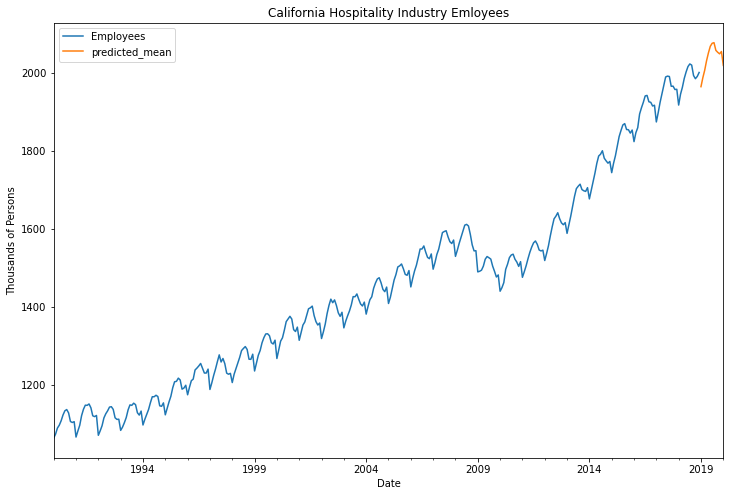

In [52]:
df['Employees'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)
plt.title("California Hospitality Industry Emloyees")
plt.ylabel("Thousands of Persons")


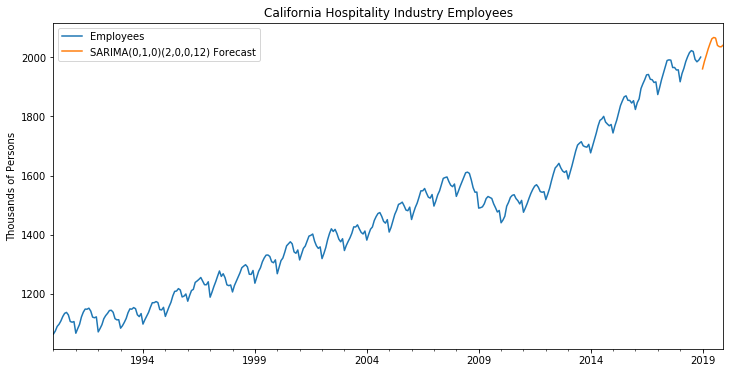

In [11]:
# DON'T WRITE HERE

## Great job!